# Plotly Go & Express

## Install Plotly

In [1]:
# !pip install plotly, cufflinks, chart_studio, kaleido

In [2]:
# !pip install kaleido

## Import libraries

In [3]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.io as pio

# pio.renderers.default = "svg"

## Import datasets

In [4]:
tips = px.data.tips()
iris = px.data.iris()
gap  = px.data.gapminder()

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [7]:
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


## Scatter Plot

In [13]:
gap_2007 = gap[gap["year"] == 2007]
gap_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


### Using Plotly Go

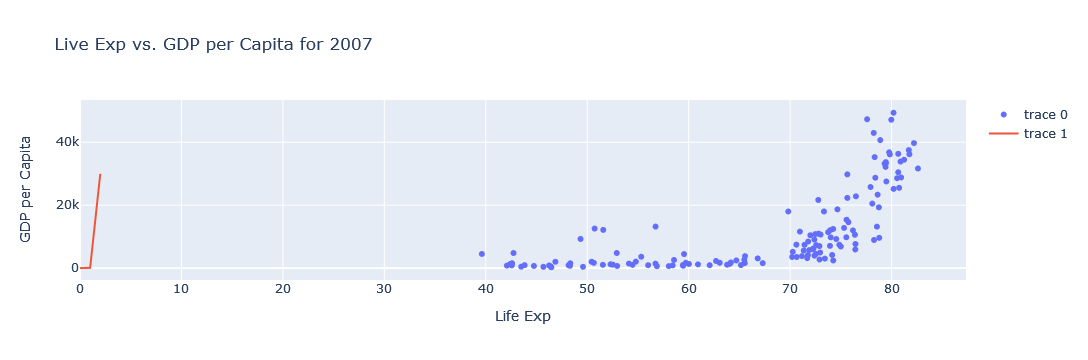

In [19]:
# Select the data which have to plot, every element of this list is called "trace".
# Every trace is represented to a chart of the Plotly.
trace1 = go.Scatter(x=gap_2007["lifeExp"], y=gap_2007["gdpPercap"], mode="markers")
trace2 = go.Scatter(x=[0, 1, 2], y=[0, 90, 30000], mode="lines")

data   = [trace1, trace2]

# degisn the chart. You can do lots of thing according to your design skills
layout = go.Layout(
    title="Live Exp vs. GDP per Capita for 2007",
    xaxis={"title":"Life Exp"},
    yaxis={"title": "GDP per Capita"}
)

# create the figure
fig = go.Figure(data=data, layout=layout)

# display the figure
fig.show()

### Using Plotly Express

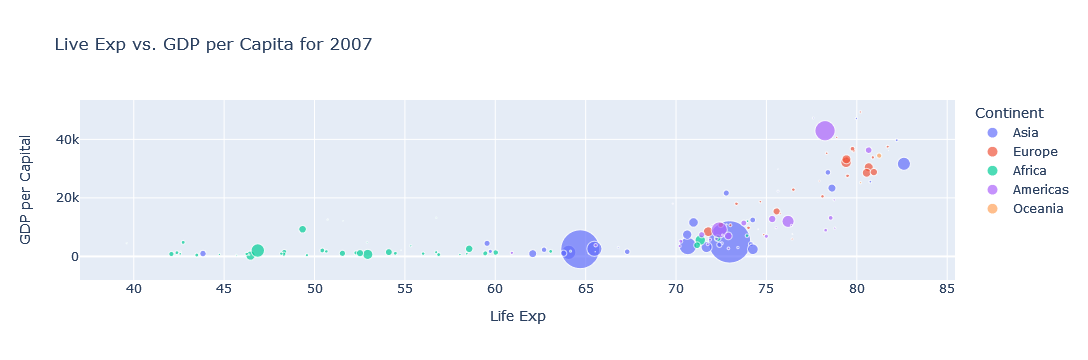

In [32]:
# now try to plot using plotly express

# you can do the task easily with the plotly express with few lines of codes
px.scatter(
    data_frame = gap_2007, 
    x          = "lifeExp", 
    y          = "gdpPercap", 
    color      = "continent", 
    size       = "pop", 
    size_max   = 30, 
    hover_name = "country",
    title      = "Live Exp vs. GDP per Capita for 2007",
    height     = 200,
    labels     = {
        "lifeExp": "Life Exp",
        "gdpPercap": "GDP per Capital",
        "continent": "Continent",
        "pop": "Population",
        "country": "Country"
    }
)

### Make animated Scatter plot

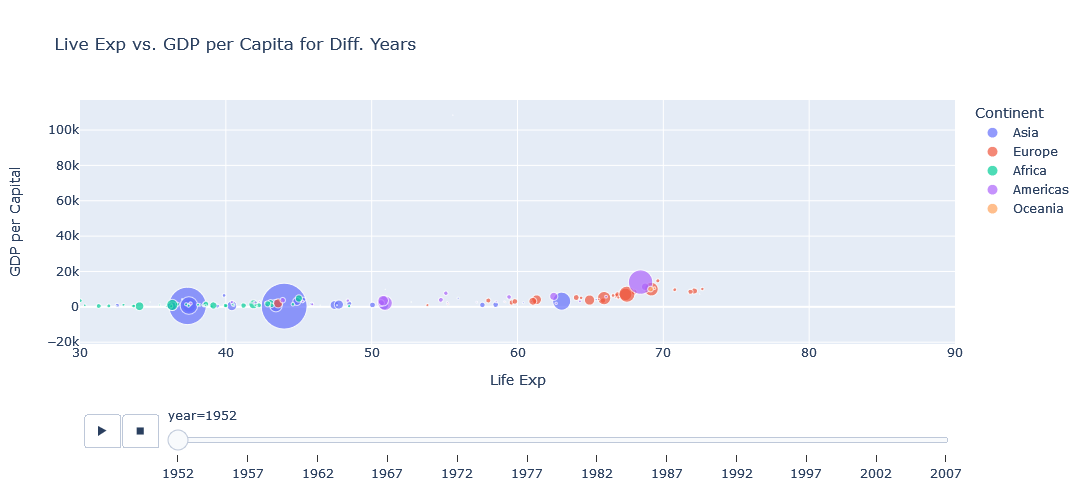

In [42]:
px.scatter(
    data_frame      = gap, 
    x               = "lifeExp", 
    y               = "gdpPercap", 
    color           = "continent", 
    size            = "pop", 
    size_max        = 50, 
    hover_name      = "country",
    title           = "Live Exp vs. GDP per Capita for Diff. Years",
    height          = 500,
    width           = 1000,
    animation_frame = "year",
    animation_group = "country",
    range_x         = [30, 90],
    labels          = {
        "lifeExp"  : "Life Exp",
        "gdpPercap": "GDP per Capital",
        "continent": "Continent",
        "pop"      : "Population",
        "country"  : "Country"
    },
)

## Line Plot

### Single Line Plot

In [43]:
gap_india = gap[gap["country"] == "India"]
gap_india.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
696,India,Asia,1952,37.373,372000000,546.565749,IND,356
697,India,Asia,1957,40.249,409000000,590.061996,IND,356
698,India,Asia,1962,43.605,454000000,658.347151,IND,356
699,India,Asia,1967,47.193,506000000,700.770611,IND,356
700,India,Asia,1972,50.651,567000000,724.032527,IND,356


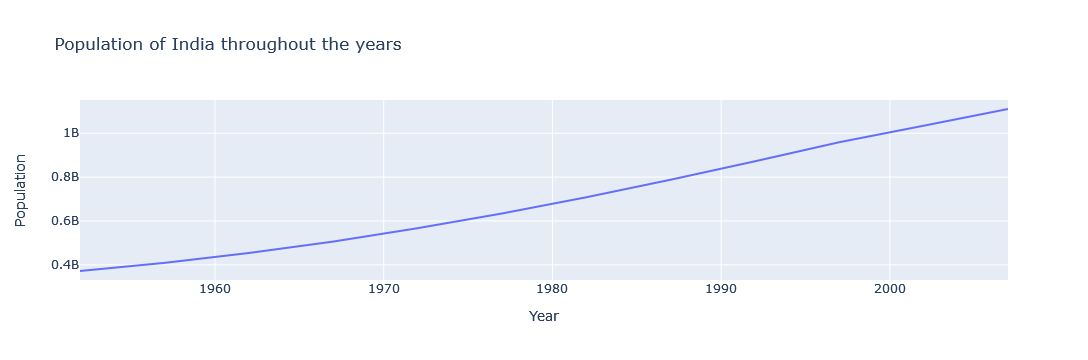

In [45]:
px.line(
    data_frame = gap_india,
    x          = "year",
    y          = "pop",
    title      = "Population of India throughout the years",
    labels     = {
        "pop" : "Population",
        "year": "Year"
    }
)

### Multiple Line Plot

In [47]:
# required countries and then filters accordingly
req_countries = ["India", "China", "Pakistan"]
gap_countries = gap[gap["country"].isin(req_countries)]

# now convert the df from long form to wide form
gap_countries = gap_countries.pivot(index="year", columns="country", values="lifeExp")
gap_countries

country,China,India,Pakistan
year,,,
1952,44.00000,37.373,43.436
1957,50.54896,40.249,45.557
1962,44.50136,43.605,47.670
1967,58.38112,47.193,49.800
1972,63.11888,50.651,51.929
1977,63.96736,54.208,54.043
1982,65.52500,56.596,56.158
1987,67.27400,58.553,58.245
1992,68.69000,60.223,60.838


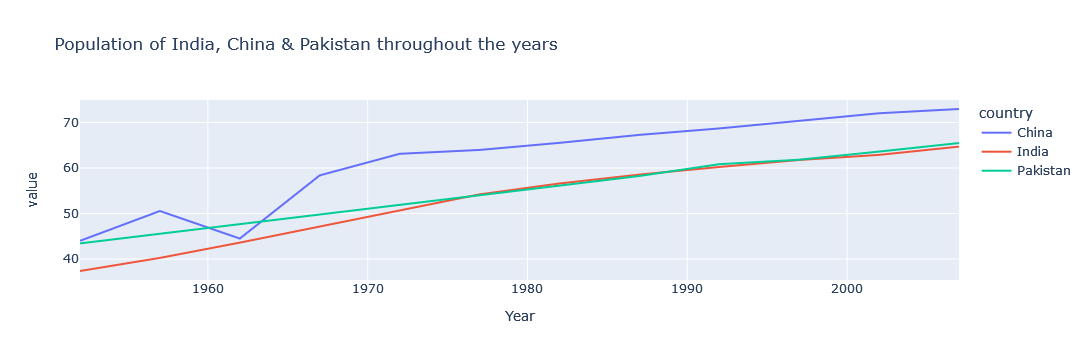

In [49]:
px.line(
    data_frame = gap_countries,
    x          = gap_countries.index,
    y          = gap_countries.columns,
    title      = "Population of India, China & Pakistan throughout the years",
    labels     = {
        "year": "Year"
    }
)

## Bar Chart

### Single Bar Chart

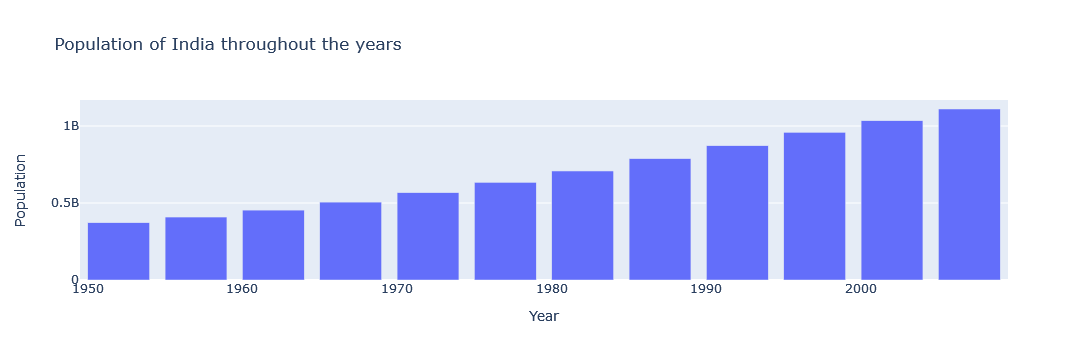

In [51]:
px.bar(
    data_frame = gap_india,
    x          = "year",
    y          = "pop",
    title      = "Population of India throughout the years",
    labels     = {
        "year": "Year",
        "pop" : "Population"
    }
)

### Stacked Bar Chart

In [53]:
gap_countries_gdp = gap[gap["country"].isin(req_countries)].pivot(index="year", columns="country", values="gdpPercap")
gap_countries_gdp

country,China,India,Pakistan
year,,,
1952,400.448611,546.565749,684.597144
1957,575.987001,590.061996,747.083529
1962,487.674018,658.347151,803.342742
1967,612.705693,700.770611,942.408259
1972,676.900092,724.032527,1049.938981
1977,741.237470,813.337323,1175.921193
1982,962.421381,855.723538,1443.429832
1987,1378.904018,976.512676,1704.686583
1992,1655.784158,1164.406809,1971.829464


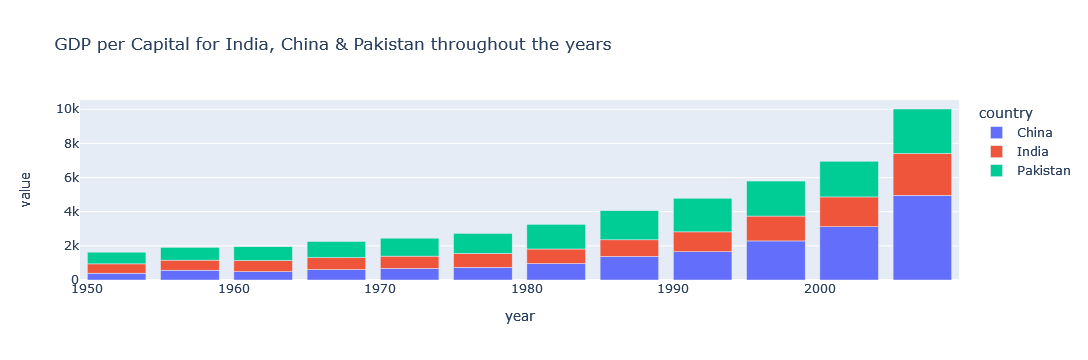

In [54]:
px.bar(
    data_frame = gap_countries_gdp,
    x          = gap_countries_gdp.index,
    y          = gap_countries_gdp.columns,
    title      = "GDP per Capital for India, China & Pakistan throughout the years"
)

### Grouped Bar Chart

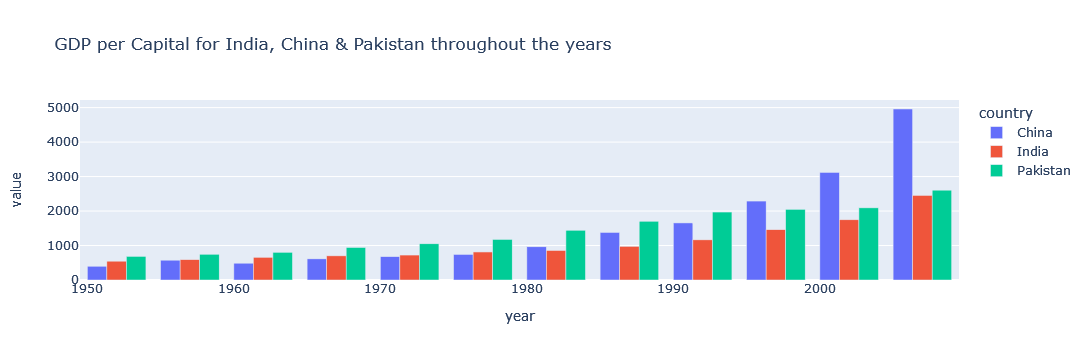

In [55]:
px.bar(
    data_frame = gap_countries_gdp,
    x          = gap_countries_gdp.index,
    y          = gap_countries_gdp.columns,
    barmode    = "group",
    title      = "GDP per Capital for India, China & Pakistan throughout the years"
)

In [56]:
gap_countries_pop = gap[gap["country"].isin(req_countries)].pivot(index="year", columns="country", values="pop")
gap_countries_pop

country,China,India,Pakistan
year,,,
1952,556263527,372000000,41346560
1957,637408000,409000000,46679944
1962,665770000,454000000,53100671
1967,754550000,506000000,60641899
1972,862030000,567000000,69325921
1977,943455000,634000000,78152686
1982,1000281000,708000000,91462088
1987,1084035000,788000000,105186881
1992,1164970000,872000000,120065004


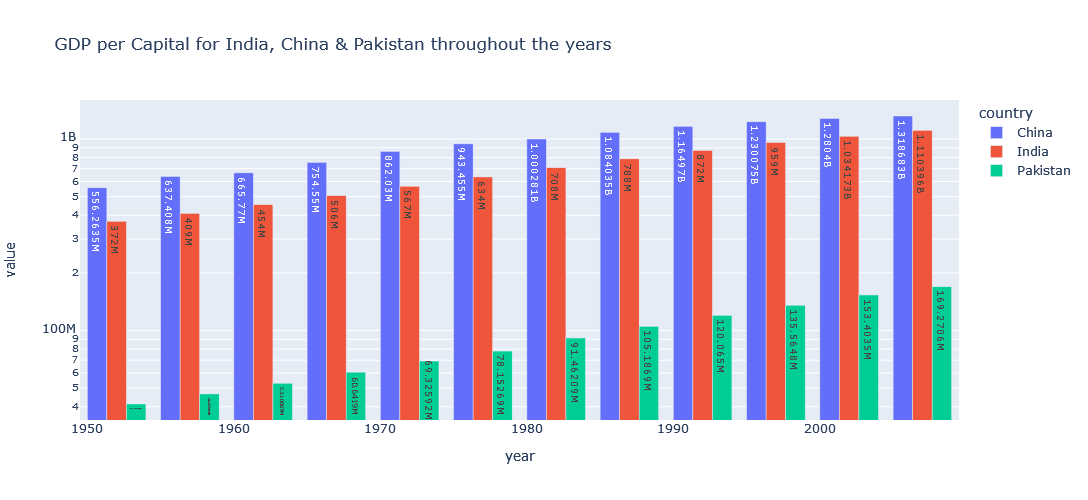

In [60]:
px.bar(
    data_frame = gap_countries_pop,
    x          = gap_countries_pop.index,
    y          = gap_countries_pop.columns,
    log_y      = True,  # new?
    text_auto  = True,  # put the values on the bars
    barmode    = "group",
    height     = 500,
    title      = "GDP per Capital for India, China & Pakistan throughout the years"
)